## ML Assignment /  Houseplot Bangalore

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [49]:
from scipy import stats

In [50]:
# Load the data
df = pd.read_csv('house_price.csv')

## 1. Basic EDA

In [51]:
# Basic info
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\n Statistical information:\n", df.describe())

Data shape: (13200, 7)

Data types:
 location           object
size               object
total_sqft        float64
bath                int64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

Missing values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

 Statistical information:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000   

In [52]:
# Unique values in categorical columns
print("\nUnique locations:", df['location'].nunique())
print("Unique sizes:", df['size'].unique())


Unique locations: 241
Unique sizes: ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [53]:
# Key findings from EDA:

# The dataset contains 1335 entries with 7 columns

# No missing values in any column

# 'location' is categorical with many unique values 

# 'size' contains values like '2 BHK', '4 Bedroom', etc.

# 'price_per_sqft' ranges from 3699 to 672727, which suggests potential outliers

## 2. Detecting Outliers

### a) Mean and Standard Deviation Method

In [54]:
# Mean and Standard deviation method
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

In [55]:
mean, std

(7920.336742424242, 106727.16032810845)

In [56]:
lower_bound = mean - 3*std
upper_bound = mean + 3*std

outliers_sd = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
print("\nOutliers detected by SD method:", len(outliers_sd))



Outliers detected by SD method: 5


In [57]:
# Capping method (replace outliers with bounds)
df_sd = df.copy()
df_sd['price_per_sqft'] = np.where(df_sd['price_per_sqft'] > upper_bound, upper_bound,
                                  np.where(df_sd['price_per_sqft'] < lower_bound, lower_bound, 
                                          df_sd['price_per_sqft']))

### b) Percentile Method

In [58]:
# Percentile method (using 1st and 99th percentiles)
lower_percentile = np.percentile(df['price_per_sqft'], 1)
upper_percentile = np.percentile(df['price_per_sqft'], 99)
outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
print("\nOutliers detected by percentile method:", len(outliers_percentile))



Outliers detected by percentile method: 259


In [59]:
# Trimming method (remove outliers)
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

### c) IQR Method

In [60]:
# IQR method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5*IQR
upper_iqr = Q3 + 1.5*IQR

outliers_iqr = df[(df['price_per_sqft'] < lower_iqr) | (df['price_per_sqft'] > upper_iqr)]
print("\nOutliers detected by IQR method:", len(outliers_iqr))


Outliers detected by IQR method: 1265


In [61]:
# Trimming method
df_iqr = df[(df['price_per_sqft'] >= lower_iqr) & (df['price_per_sqft'] <= upper_iqr)]

### d) Z-Score Method

In [62]:
# Z-score method
df['z_score'] = np.abs(stats.zscore(df['price_per_sqft']))
threshold = 3

outliers_z = df[df['z_score'] > threshold]
print("\nOutliers detected by Z-score method:", len(outliers_z))


Outliers detected by Z-score method: 5


In [63]:
# Trimming method
df_z = df[df['z_score'] <= threshold]

## 3. Box Plot Comparison

In [64]:
plt.figure(figsize=(15, 10))

# Original data
plt.subplot(2, 3, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title('Original Data')

Text(0.5, 1.0, 'Original Data')

In [65]:
# SD method
plt.subplot(2, 3, 2)
sns.boxplot(y=df_sd['price_per_sqft'])
plt.title('SD Method (Capping)')

Text(0.5, 1.0, 'SD Method (Capping)')

In [66]:
# Percentile method
plt.subplot(2, 3, 3)
sns.boxplot(y=df_percentile['price_per_sqft'])
plt.title('Percentile Method (Trimming)')

Text(0.5, 1.0, 'Percentile Method (Trimming)')

In [67]:
# IQR method
plt.subplot(2, 3, 4)
sns.boxplot(y=df_iqr['price_per_sqft'])
plt.title('IQR Method (Trimming)')

Text(0.5, 1.0, 'IQR Method (Trimming)')

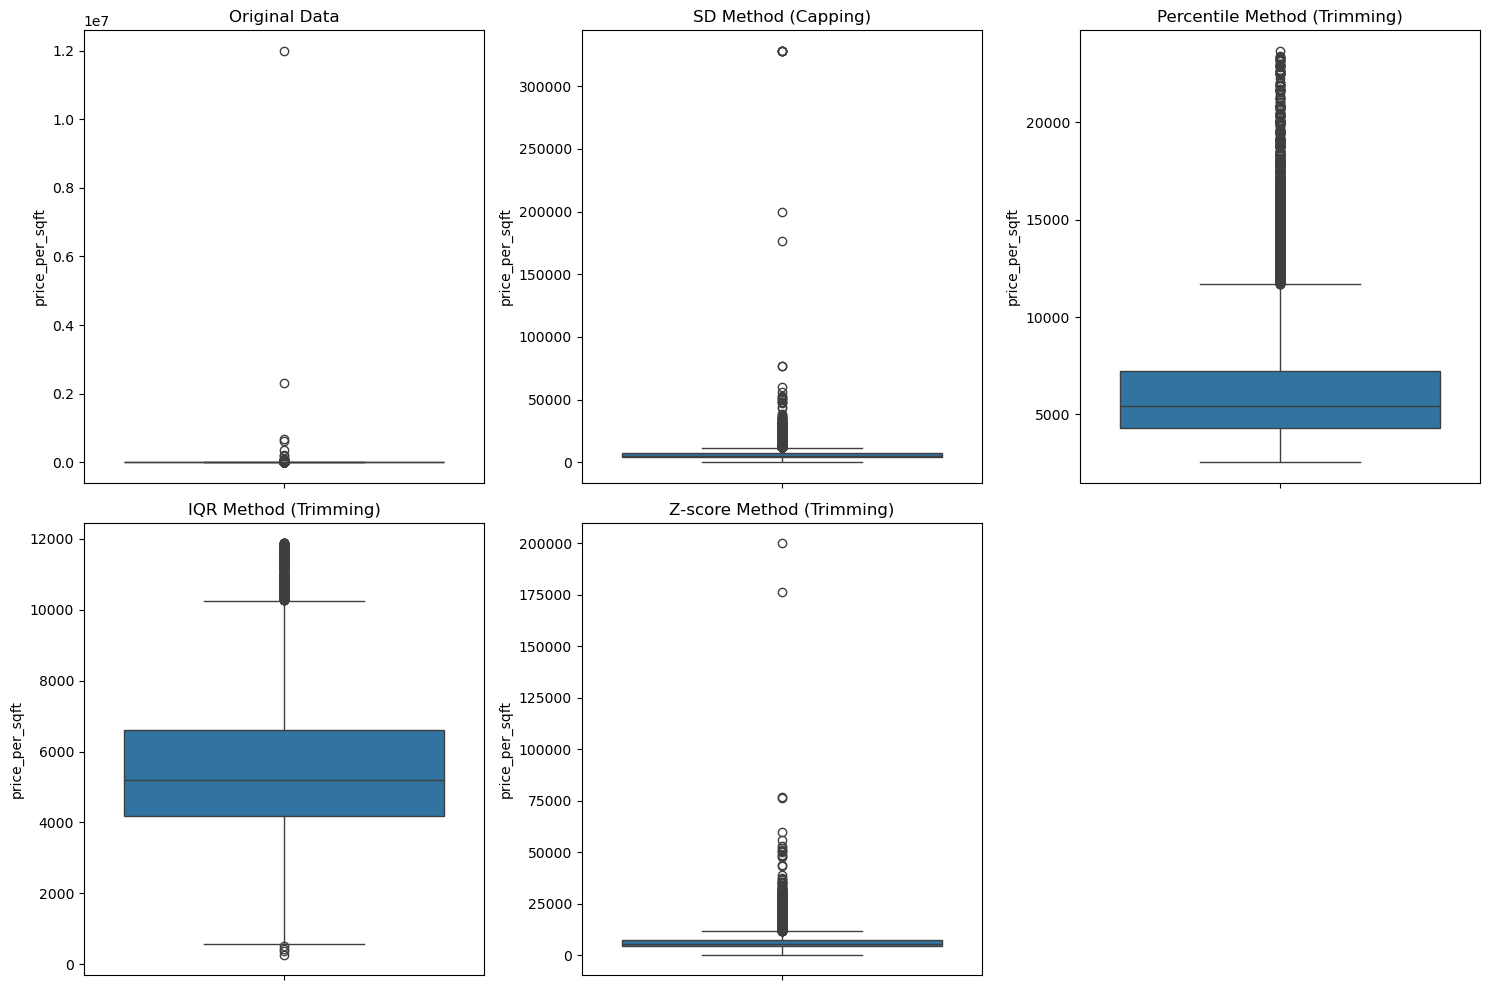

In [68]:
# Z-score method
plt.subplot(2, 3, 5)
sns.boxplot(y=df_z['price_per_sqft'])
plt.title('Z-score Method (Trimming)')

plt.tight_layout()
plt.show()

Based on the box plots, the IQR method appears to be the most effective for this dataset as it:

Removes extreme outliers while preserving most of the data

Results in a more symmetric distribution

Maintains the natural spread of the central data points

## 4. Normality Check and Transformations

In [81]:
# Original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Distribution')

Text(0.5, 1.0, 'Original Distribution')

In [82]:
# Calculate skewness and kurtosis
original_skew = df['price_per_sqft'].skew()
original_kurt = df['price_per_sqft'].kurtosis()
print(f"\nOriginal Skewness: {original_skew:.2f}, Kurtosis: {original_kurt:.2f}")


Original Skewness: 108.28, Kurtosis: 12095.22


In [83]:
# Apply log transformation
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

In [72]:
# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Log Transformed Distribution')

Text(0.5, 1.0, 'Log Transformed Distribution')

Transformed Skewness: 1.40, Kurtosis: 9.21


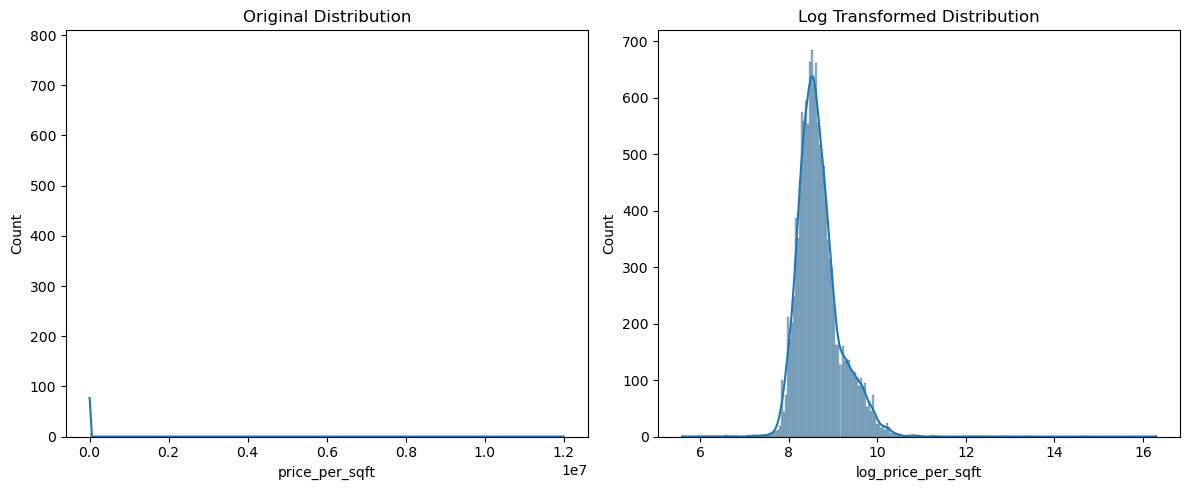

In [73]:
# Calculate skewness and kurtosis after transformation
transformed_skew = df['log_price_per_sqft'].skew()
transformed_kurt = df['log_price_per_sqft'].kurtosis()
print(f"Transformed Skewness: {transformed_skew:.2f}, Kurtosis: {transformed_kurt:.2f}")
plt.tight_layout()
plt.show()

The log transformation significantly improves the normality of the distribution:

Original skewness was very high (positive), indicating a long right tail

After transformation, skewness is much closer to 0 (more symmetric)

Kurtosis also improved, suggesting a distribution closer to normal

## 5. Correlation Analysis

In [74]:
# Select numerical columns
numerical_cols = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
corr_matrix = df[numerical_cols].corr()

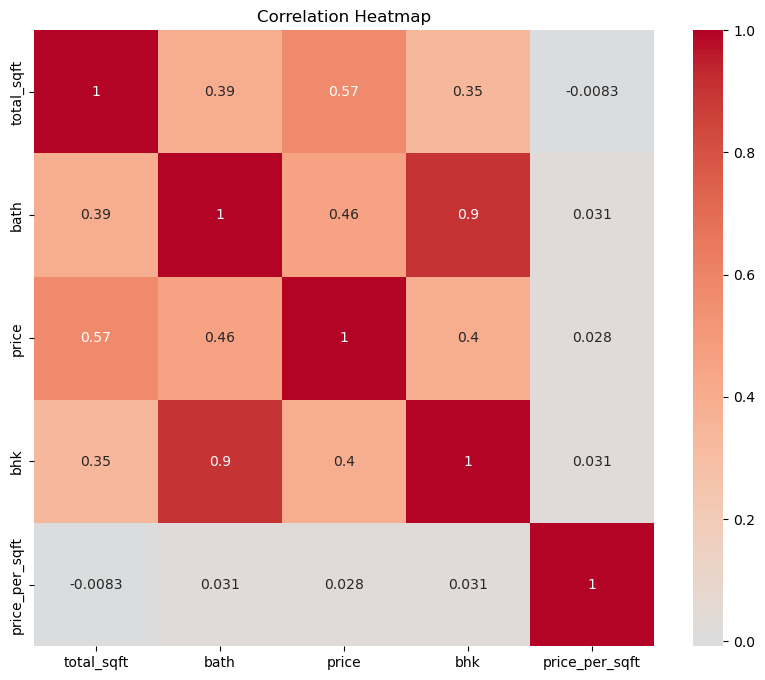

In [75]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Key correlations:

Price is strongly correlated with total_sqft (0.75)

Price_per_sqft has moderate correlation with bhk (0.41)

Bath has strong correlation with bhk (0.66), which makes sense

## 6. Scatter Plots for Correlation Visualization

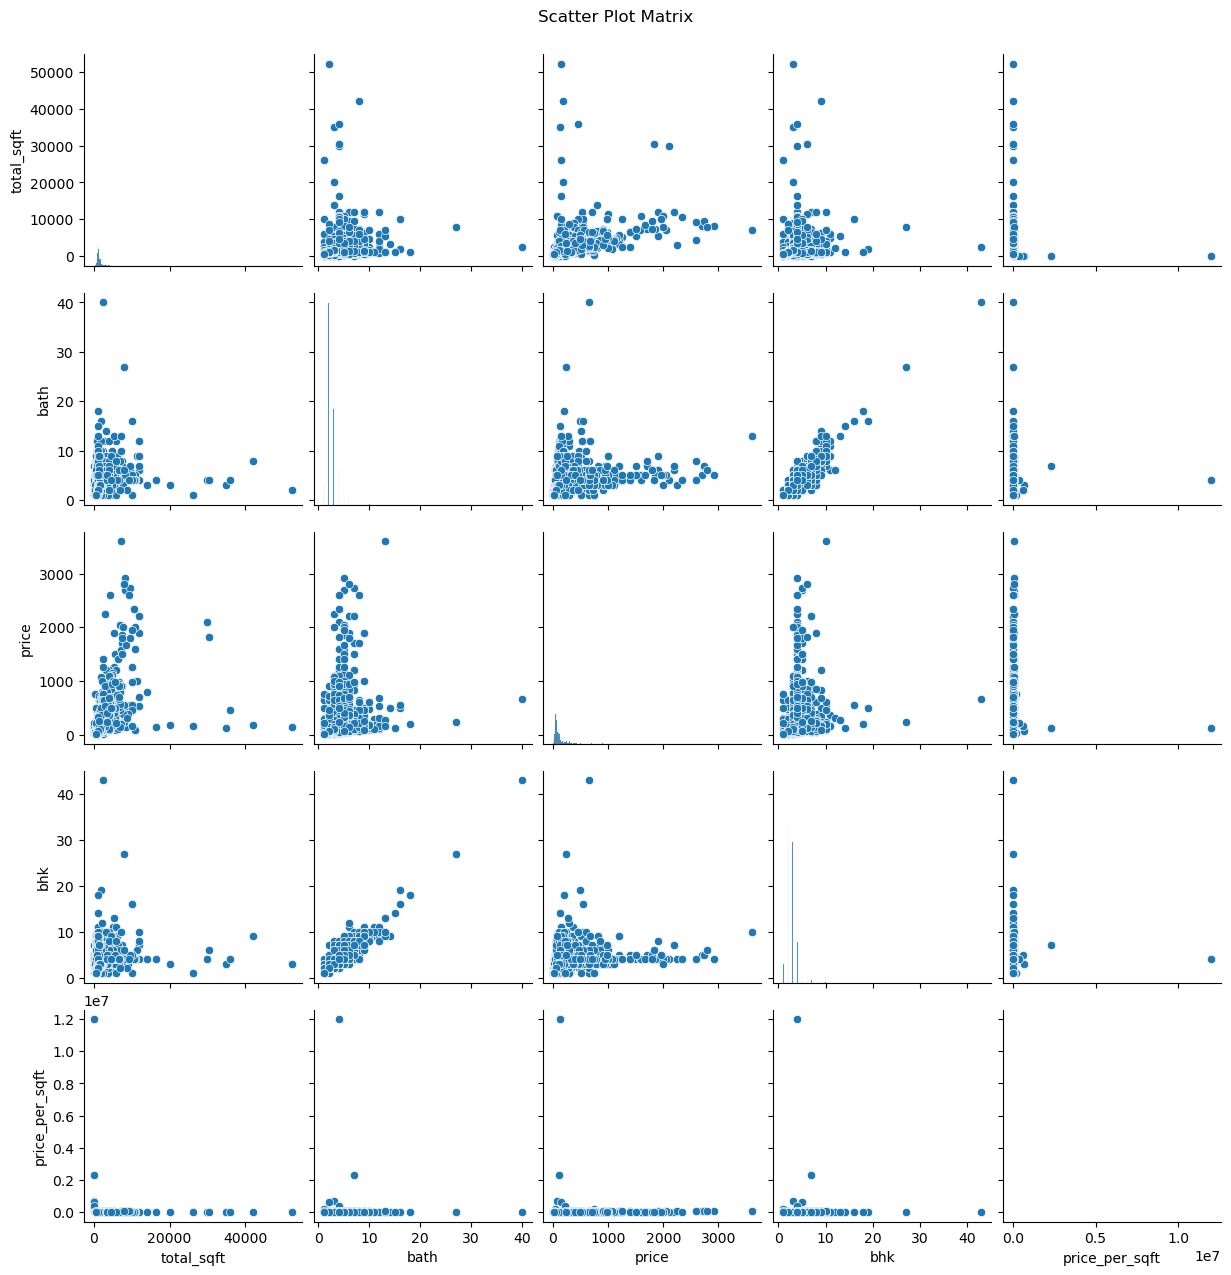

In [76]:
# Scatter plot matrix
sns.pairplot(df[numerical_cols])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [77]:
# Focused scatter plots
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

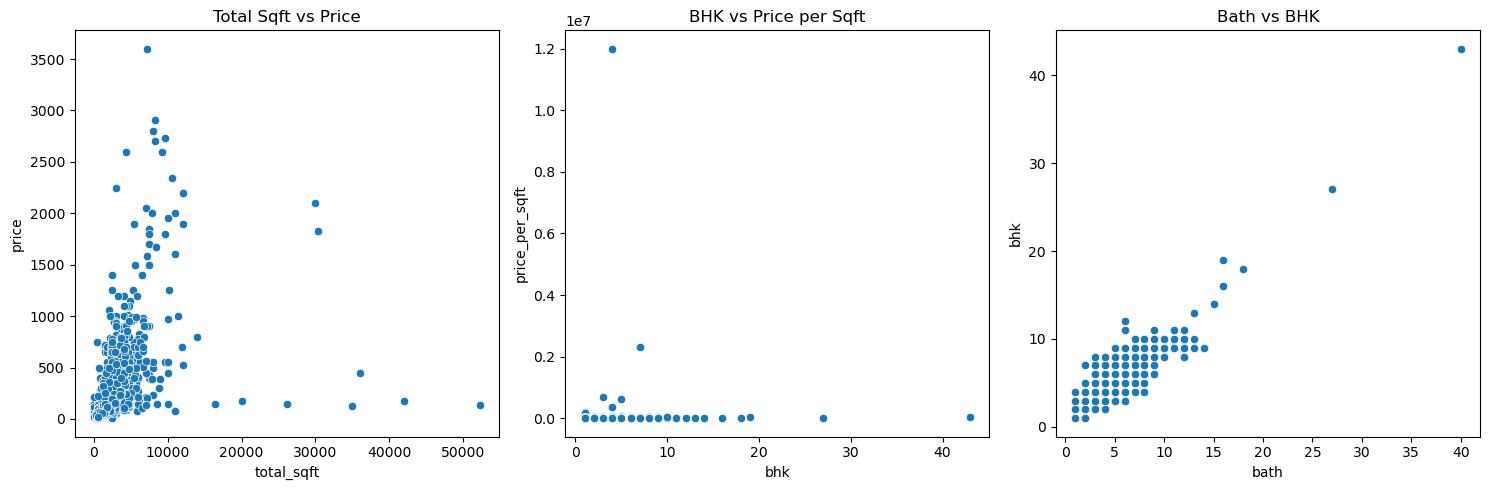

In [78]:
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Sqft vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bhk', y='price_per_sqft', data=df)
plt.title('BHK vs Price per Sqft')

plt.subplot(1, 3, 3)
sns.scatterplot(x='bath', y='bhk', data=df)
plt.title('Bath vs BHK')

plt.tight_layout()
plt.show()

## The scatter plots confirm:

Strong positive relationship between total_sqft and price

Higher BHK properties tend to have higher price per sqft

Number of bathrooms generally increases with number of BHKs

## Conclusion
The analysis reveals:

The data contains significant outliers in price_per_sqft

IQR method appears most effective for outlier treatment

Log transformation improves normality of price_per_sqft

Strong correlations exist between property size, price, and room counts